# First Neural Network Model Excercise
- Look at new dataset that I created below. The function is y = X **2 + X + b (non-linear function)
- Try to run a learning loop and looked to a results.
- Model with linear function canot leanr non-linear function, So edit the model so it can learn a non-linear function (try to change a forward method)
- Then try to use some different loss function and optimizer, for example nn.MSELoss() and torch.optim.Adam().
- Compare the result with previous methods.


### COMPETION
- The winner is the one who can achieve 0.0001 loss in the least number of epochs
- That ones who wins get as a price my Congratulation. XD
- Also you can share your results on discord.

In [ ]:
import torch
from torch import nn # neural network graphs

torch.__version__

'2.2.1+cu121'

In [ ]:
# Create known parameters for linear

b = 0.3
a = 0.2

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(1) # unsqueezing it on the 1st dimension provides a column vector, which is often preferred for tensor operations.
y =  X * a + b

X_original = torch.arange(start,end,step)

X[:10], y[:10], X_original[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3040],
         [0.3080],
         [0.3120],
         [0.3160],
         [0.3200],
         [0.3240],
         [0.3280],
         [0.3320],
         [0.3360]]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]))

In [ ]:
train_split = int(0.8 * len(X)) # define 80% for training

X_train, y_train = X[:train_split], y[:train_split] # create training dataset (80%)
X_test, y_test = X[train_split:], y[train_split:] # create test dataset (20%)

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
import matplotlib.pyplot as plt

def plt_predictions(train_data : torch.Tensor = X_train,
                     train_labels : torch.Tensor = y_train,
                     test_data : torch.Tensor = X_test,
                     test_labels : torch.Tensor = y_test,
                     predictions : torch.Tensor = None):
  """
  Plots training data, test data, and compares predictions.

  """
  plt.figure(figsize=(10,7)) # Size of a plot

  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data") # plot data points with x and y coordinates

  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")


  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10})

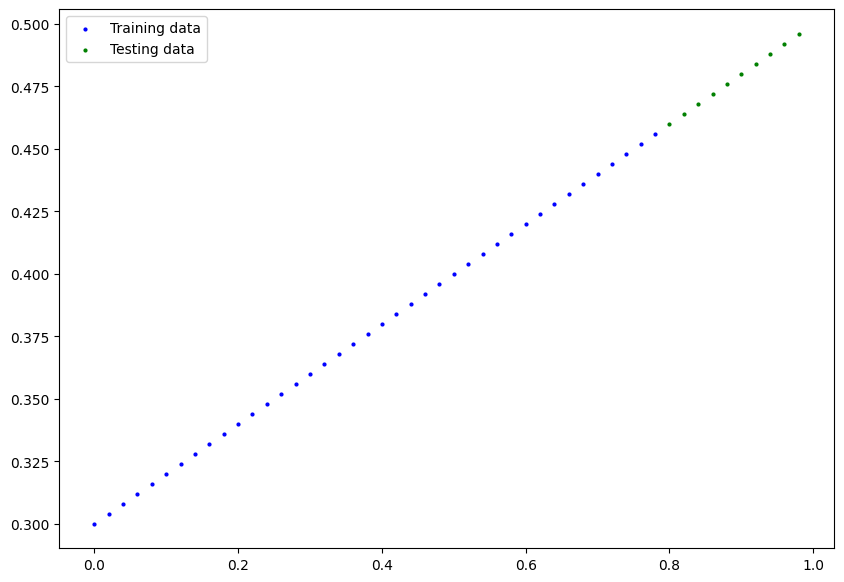

In [ ]:
plt_predictions() # we can use it without parameters as the default values are already set

# 1. Model


In [ ]:
# Create linear regression model class
class LinearRegressionModule(nn.Module): # <- everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(1,28)
    self.layer2 = nn.Linear(28,1)

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:# <- We need to overwrite this method
    return self.layer2(self.layer(x))

In [ ]:
torch.manual_seed(42) # sets a seed for reproducibility, ensuring that random operations yield the same results each time

# Create an instance of the model

model_0 = LinearRegressionModule()
list(model_0.parameters())

[Parameter containing:
 tensor([[ 0.7645],
         [ 0.8300],
         [-0.2343],
         [ 0.9186],
         [-0.2191],
         [ 0.2018],
         [-0.4869],
         [ 0.5873],
         [ 0.8815],
         [-0.7336],
         [ 0.8692],
         [ 0.1872],
         [ 0.7388],
         [ 0.1354],
         [ 0.4822],
         [-0.1412],
         [ 0.7709],
         [ 0.1478],
         [-0.4668],
         [ 0.2549],
         [-0.4607],
         [-0.1173],
         [-0.4062],
         [ 0.6634],
         [-0.7894],
         [-0.4610],
         [-0.2824],
         [-0.6013]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0944, -0.9877,  0.9031, -0.8495,  0.7720,  0.1664, -0.3247,  0.6179,
          0.1559,  0.8080,  0.1093, -0.3154,  0.2687, -0.2712,  0.4209,  0.8928,
          0.5781, -0.4372,  0.5773,  0.1789,  0.5078, -0.6095, -0.9899, -0.3864,
         -0.7670,  0.8205,  0.2880,  0.4142], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0598, -0.0033,  0.1479, -0

# Making Predictions

In [ ]:
# Make predictions with models

with torch.inference_mode(): #<- this is faster as it disables gradient calculation
  y_preds = model_0(X_test)

y_preds

tensor([[0.5491],
        [0.5572],
        [0.5654],
        [0.5735],
        [0.5816],
        [0.5898],
        [0.5979],
        [0.6060],
        [0.6142],
        [0.6223]])

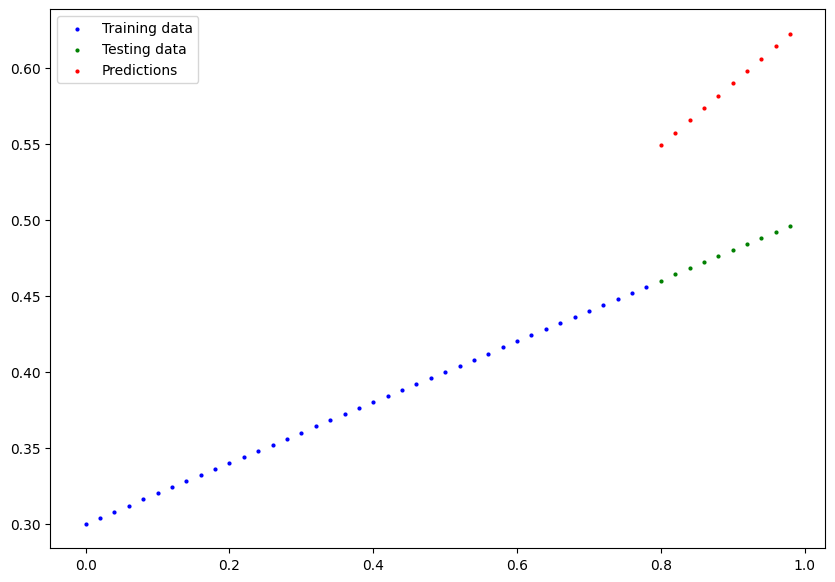

In [ ]:
plt_predictions(predictions=y_preds)

# Learning


In [ ]:
# Define the loss function
loss_fn = nn.MSELoss()


# Set up an optimizer
optimizer = torch.optim.Adam(params = model_0.parameters(),
                            lr = 0.01)

### Building a training loop (and testing)

0. Loop through the data

1. Forward pass goes through model

2. Calculate the loss

3. Optimize

4. Loss backward like a reverse engeneering

5. Optimizer step - Gradient descent

In [ ]:
epoch_count = []
loss_values = []
test_loss_values = []

In [ ]:
torch.manual_seed(42)

epochs = 100


for epoch in range(epochs):

  ### Training
  model_0.train()

  # 1. Forward pass = pass data through the model
  y_pred = model_0(X_train)

  # 2. Loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer
  optimizer.zero_grad() # <-- zeros the gradients to prevent accumulation from previous iterations

  # 4. backpropagation
  loss.backward() # <-- calculates gradients of the loss with respect to model parameters

  #5. Step optimizer
  optimizer.step() # <-- updates model parameters based on gradients and learning rate

  ### Testing
  model_0.eval() #<- sets the model to evaluation mode (e.g., disables dropout)

  with torch.inference_mode():
    # 1. Forward pass
    test_preds = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test)



  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

  print(f"Epoch: {epoch + 1} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 1 | Loss: 0.0022972470615059137 | Test loss: 0.0022972470615059137
Epoch: 2 | Loss: 0.013322612270712852 | Test loss: 0.013322612270712852
Epoch: 3 | Loss: 0.0007887309184297919 | Test loss: 0.0007887309184297919
Epoch: 4 | Loss: 0.010607047006487846 | Test loss: 0.010607047006487846
Epoch: 5 | Loss: 0.005613753106445074 | Test loss: 0.005613753106445074
Epoch: 6 | Loss: 5.32806952833198e-05 | Test loss: 5.32806952833198e-05
Epoch: 7 | Loss: 0.0030461414717137814 | Test loss: 0.0030461414717137814
Epoch: 8 | Loss: 0.005887999199330807 | Test loss: 0.005887999199330807
Epoch: 9 | Loss: 0.0032004625536501408 | Test loss: 0.0032004625536501408
Epoch: 10 | Loss: 0.0002034236676990986 | Test loss: 0.0002034236676990986
Epoch: 11 | Loss: 0.0010675393277779222 | Test loss: 0.0010675393277779222
Epoch: 12 | Loss: 0.003298423485830426 | Test loss: 0.003298423485830426
Epoch: 13 | Loss: 0.002957626013085246 | Test loss: 0.002957626013085246
Epoch: 14 | Loss: 0.0008699155296199024 | Test l

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

list(model_0.parameters()) # you can see the updated parameters

[Parameter containing:
 tensor([[ 0.7381],
         [ 0.8664],
         [-0.2501],
         [ 0.9326],
         [-0.3187],
         [ 0.2059],
         [-0.4842],
         [ 0.5858],
         [ 0.8546],
         [-0.7507],
         [ 0.8533],
         [ 0.2022],
         [ 0.7420],
         [ 0.1504],
         [ 0.4669],
         [-0.1652],
         [ 0.7559],
         [ 0.1634],
         [-0.4601],
         [ 0.2598],
         [-0.4559],
         [-0.1174],
         [-0.4050],
         [ 0.6565],
         [-0.7701],
         [-0.4562],
         [-0.2976],
         [-0.6004]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0768, -0.9492,  0.8943, -0.8411,  0.6831,  0.1641, -0.3162,  0.6105,
          0.1378,  0.7764,  0.1010, -0.3061,  0.2657, -0.2619,  0.4128,  0.8762,
          0.5704, -0.4287,  0.5761,  0.1773,  0.5042, -0.6033, -0.9826, -0.3841,
         -0.7553,  0.8171,  0.2782,  0.4040], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0483, -0.0212,  0.1439, -0

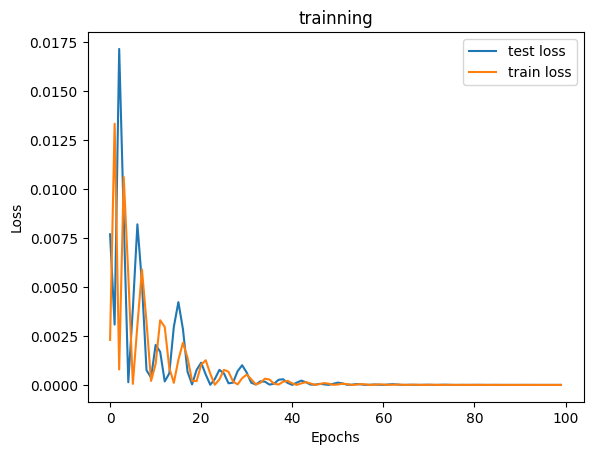

In [ ]:
plt.plot(epoch_count, torch.tensor(test_loss_values).cpu().numpy(), label = "test loss") # matplotlib expects NumPy arrays, so PyTorch tensors are converted to NumPy arrays on the CPU.
plt.plot(epoch_count, torch.tensor(loss_values).cpu().numpy(), label = "train loss")
plt.title("Training") # Plot title
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

(None, None)

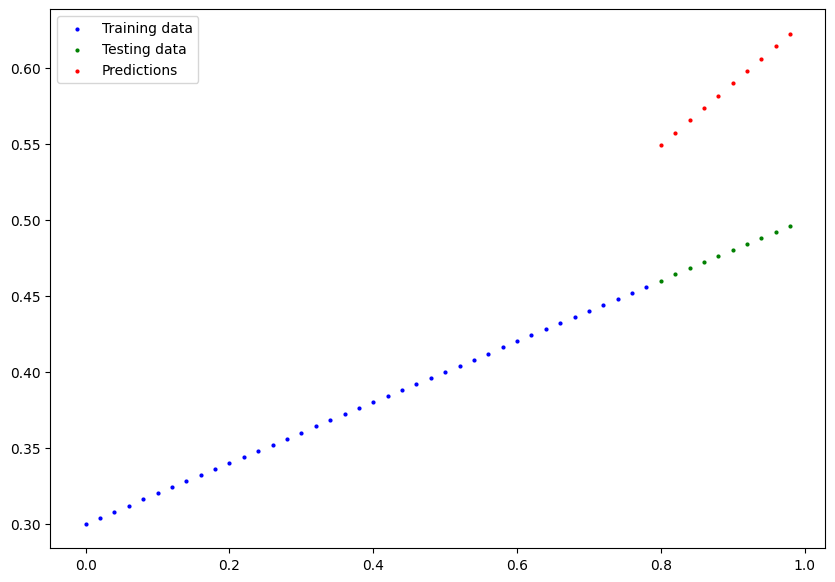

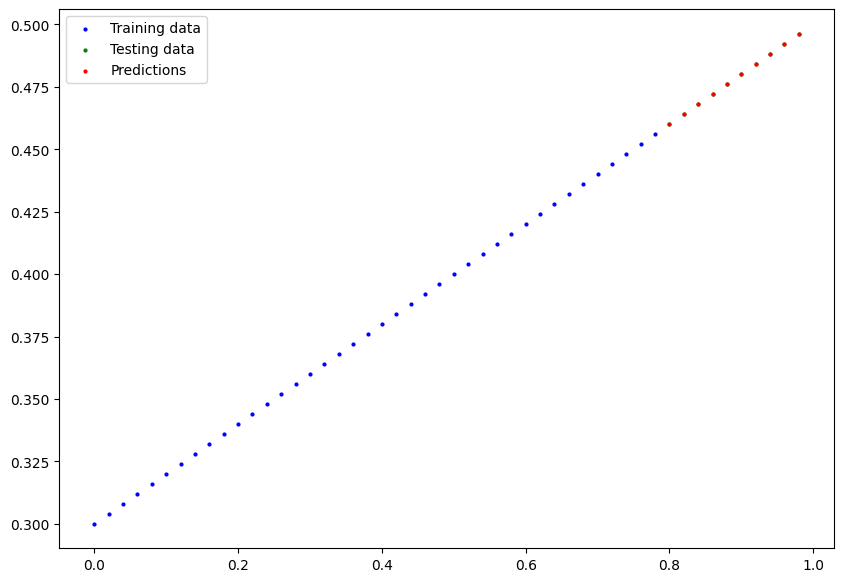

In [ ]:
plt_predictions(predictions=y_preds), plt_predictions(predictions=y_preds_new)


## Saving models in PyTorch

1. torch.save() - save PyTorch project to pytohon pickle format
2. torch.load() - load project
3. torch.nn.Module.load_state_dic() - this allowes saves your models in state dic

In [ ]:
# Saving our PyTorch model
from pathlib import Path

model_path = Path("models") # define the path for models
model_path.mkdir(parents = True, exist_ok = True) # create the directory if it doesn't exist

model_name = "01_PyTorch_workflow_model_0.pth"
model_save_path = model_path / model_name # full path for the model file

torch.save(model_0.state_dict(), model_save_path) # save the model's state dictionary to the specified path

In [ ]:
torch.load(model_save_path) # load the saved model's state dictionary

OrderedDict([('layer.weight',
              tensor([[ 0.7432],
                      [ 0.8587],
                      [-0.2470],
                      [ 0.9296],
                      [-0.3032],
                      [ 0.2048],
                      [-0.4843],
                      [ 0.5857],
                      [ 0.8598],
                      [-0.7468],
                      [ 0.8565],
                      [ 0.1990],
                      [ 0.7411],
                      [ 0.1473],
                      [ 0.4700],
                      [-0.1606],
                      [ 0.7590],
                      [ 0.1603],
                      [-0.4616],
                      [ 0.2585],
                      [-0.4569],
                      [-0.1170],
                      [-0.4048],
                      [ 0.6579],
                      [-0.7739],
                      [-0.4572],
                      [-0.2945],
                      [-0.6004]])),
             ('layer.bias',
              t

In [ ]:
model_0.state_dict() # the current model's state dictionary in RAM

OrderedDict([('layer.weight',
              tensor([[ 0.7432],
                      [ 0.8587],
                      [-0.2470],
                      [ 0.9296],
                      [-0.3032],
                      [ 0.2048],
                      [-0.4843],
                      [ 0.5857],
                      [ 0.8598],
                      [-0.7468],
                      [ 0.8565],
                      [ 0.1990],
                      [ 0.7411],
                      [ 0.1473],
                      [ 0.4700],
                      [-0.1606],
                      [ 0.7590],
                      [ 0.1603],
                      [-0.4616],
                      [ 0.2585],
                      [-0.4569],
                      [-0.1170],
                      [-0.4048],
                      [ 0.6579],
                      [-0.7739],
                      [-0.4572],
                      [-0.2945],
                      [-0.6004]])),
             ('layer.bias',
              t

In [ ]:
loaded_model_0 = LinearRegressionModule() # when loading a model, we need to first instantiate the model class

loaded_model_0.load_state_dict(torch.load(model_save_path)) # load the saved state dictionary into the model

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict() # get the parameters of the loaded model

OrderedDict([('layer.weight',
              tensor([[ 0.7380],
                      [ 0.8664],
                      [-0.2501],
                      [ 0.9326],
                      [-0.3188],
                      [ 0.2059],
                      [-0.4842],
                      [ 0.5858],
                      [ 0.8546],
                      [-0.7507],
                      [ 0.8533],
                      [ 0.2022],
                      [ 0.7420],
                      [ 0.1505],
                      [ 0.4669],
                      [-0.1652],
                      [ 0.7559],
                      [ 0.1634],
                      [-0.4601],
                      [ 0.2598],
                      [-0.4559],
                      [-0.1174],
                      [-0.4050],
                      [ 0.6565],
                      [-0.7701],
                      [-0.4562],
                      [-0.2976],
                      [-0.6004]])),
             ('layer.bias',
              t

In [ ]:
# How to make predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

y_preds_new == loaded_model_preds # compare predictions from the current model and the loaded model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])